In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing value found 


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age: The dataset includes only adults, ranging from 18 to 64 years old, with a significant portion concentrated in the middle-age group (25 to 53 years old).

BMI: The dataset emphasizes overweight individuals. Only about 25% of the population has a BMI below 26.3, indicating that the majority fall within the overweight or obese categories.

Children: Most individuals in the dataset either have no children or between one and two children, reflecting common household structures.

Insurance Charges: The median insurance charge is lower than the mean, suggesting a right-skewed distribution. This indicates the presence of a small number of cases with extremely high costs, making insurance charges highly variable. In other words, while many individuals pay moderate charges, some face disproportionately high expenses.

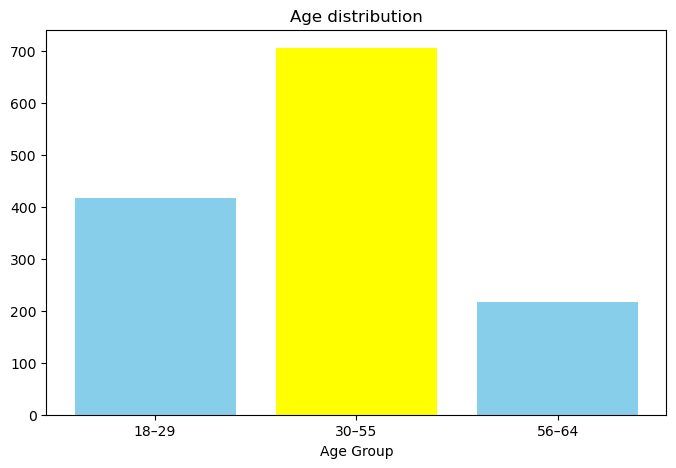

In [5]:
bins = [18,29,55,64]
labels = ["18–29", "30–55", "56–64"]
df['age_group'] = pd.cut(df['age'], bins= bins, labels= labels,include_lowest=True)
height = [417, 705, 216]
colors = ['skyblue', 'yellow', 'skyblue']
plt.figure(figsize=(8,5))
plt.bar(x=labels, height=height, color =colors)
plt.xlabel('Age Group')
plt.title('Age distribution')
plt.xticks(rotation=0)
plt.show()

The distribution is skewed toward middle-age adults. However the younger is also sizable, show that the dataset doesn't just focus on the older individuals.

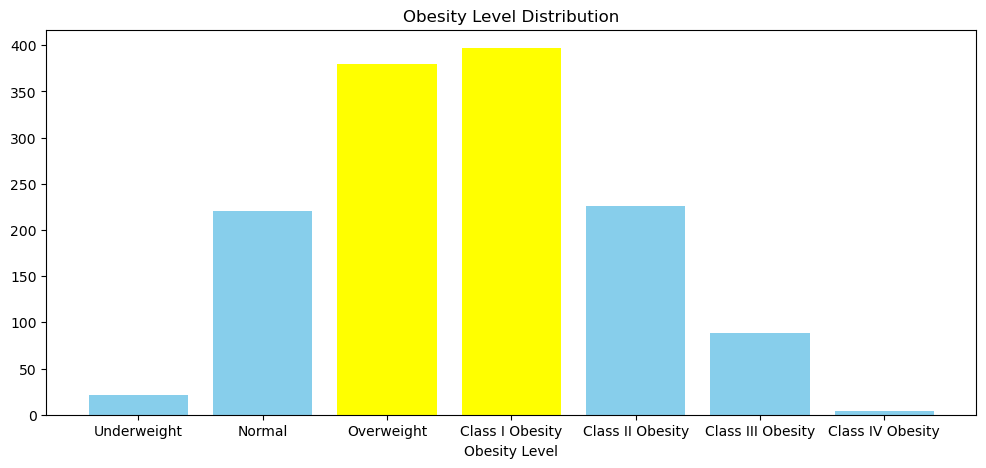

In [6]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 49.9, float('inf')]
bmi_labels = [
    "Underweight",
    "Normal",
    "Overweight",
    "Class I Obesity",
    "Class II Obesity",
    "Class III Obesity",
    "Class IV Obesity"
]
df['obesity_level']= pd.cut(df['age'],bins=bmi_bins,labels=bmi_labels,right=True)
heights = [21, 221, 380, 397, 226, 89, 4]
colors = ["skyblue",
    "skyblue",
    "yellow",
    "yellow",
    "skyblue",
    "skyblue",
    "skyblue"]
plt.figure(figsize=(12,5))
plt.bar(x = bmi_labels, height = heights, color = colors)
plt.xlabel('Obesity Level')
plt.title('Obesity Level Distribution')
plt.xticks(rotation=0)
plt.show()



The largest groups are “Overweight” and “Class 1 Obesity”, together making up the majority of the dataset.

The “Normal” group is considerably smaller than the overweight/obesity groups, showing that only a minority fall within the recommended BMI range.

While overweight and Class 1 obesity dominate, there are still noticeable counts in Class 2 and Class 3 obesity.
Class 4 obesity, and Underweight is very rare, indicating that extremely high or low BMI values are outliers.

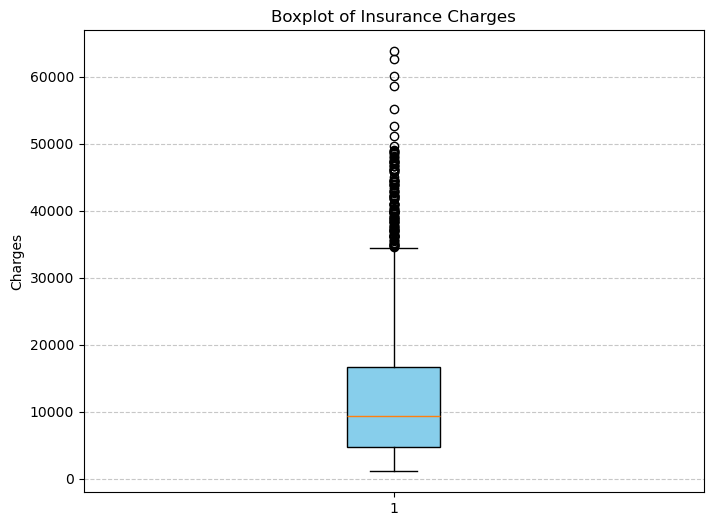

In [7]:

plt.figure(figsize=(8,6))
plt.boxplot(df["charges"], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.ylabel("Charges")
plt.title("Boxplot of Insurance Charges")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [8]:
charges = df["charges"]

Q1 = np.percentile(charges, 25)
Q3 = np.percentile(charges, 75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_outlier_charge = df[df['charges']> upper_whisker]
print(df_outlier_charge.shape)



(139, 9)


139 people that pay more than 34489.35$

The boxplot is right-skewed.

This indicates that while most people pay moderate charges, a smaller group pays very high charges.

There are a lot of high outliers, with charges going beyond 60,000 USD.

These likely represent individuals with very expensive treatments, often driven by factors like smoking, age, or chronic conditions.
